In [157]:
library(tidyverse)
library(stringr)
library(lubridate)
#install.packages("ggmap")
library(ggmap)
#install.packages("dbscan")
library(dbscan)
#install.packages("ggpubr")
library(ggpubr)

Installing package into 'C:/Users/kvnta/OneDrive/Documents/R/win-library/4.0'
(as 'lib' is unspecified)

also installing the dependencies 'matrixStats', 'RcppArmadillo', 'zip', 'SparseM', 'MatrixModels', 'conquer', 'data.table', 'openxlsx', 'minqa', 'nloptr', 'statmod', 'RcppEigen', 'carData', 'abind', 'pbkrtest', 'quantreg', 'maptools', 'rio', 'lme4', 'corrplot', 'car', 'ggrepel', 'ggsci', 'cowplot', 'ggsignif', 'gridExtra', 'polynom', 'rstatix'





  There is a binary version available but the source version is later:
     binary source needs_compilation
lme4 1.1-25 1.1-26              TRUE

  Binaries will be installed
package 'matrixStats' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'zip' successfully unpacked and MD5 sums checked
package 'SparseM' successfully unpacked and MD5 sums checked
package 'MatrixModels' successfully unpacked and MD5 sums checked
package 'conquer' successfully unpacked and MD5 sums checked
package 'data.table' successfully unpacked and MD5 sums checked
package 'openxlsx' successfully unpacked and MD5 sums checked
package 'minqa' successfully unpacked and MD5 sums checked
package 'nloptr' successfully unpacked and MD5 sums checked
package 'statmod' successfully unpacked and MD5 sums checked
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'carData' successfully unpacked and MD5 sums checked
package 'abind' s

Warning message:
"package 'ggpubr' was built under R version 4.0.3"


In [11]:
### BEGIN SOLUTION
traffic <- read_csv("chicagotraffic2019.csv")
traffic = traffic %>% filter(!is.na(LATITUDE), !is.na(LONGITUDE), 
                             LATITUDE>41, LATITUDE<43, 
                             LONGITUDE>(-89), LONGITUDE<(-86))
traffic_injuries = traffic %>% filter((INJURIES_FATAL+INJURIES_INCAPACITATING) > 0, !is.na(INJURIES_FATAL))
traffic %>% head

Warning message:
"Missing column names filled in: 'X1' [1]"
Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_double(),
  POSTED_SPEED_LIMIT = col_double(),
  LANE_CNT = col_double(),
  STREET_NO = col_double(),
  BEAT_OF_OCCURRENCE = col_double(),
  NUM_UNITS = col_double(),
  INJURIES_TOTAL = col_double(),
  INJURIES_FATAL = col_double(),
  INJURIES_INCAPACITATING = col_double(),
  INJURIES_NON_INCAPACITATING = col_double(),
  INJURIES_REPORTED_NOT_EVIDENT = col_double(),
  INJURIES_NO_INDICATION = col_double(),
  INJURIES_UNKNOWN = col_double(),
  CRASH_HOUR = col_double(),
  CRASH_DAY_OF_WEEK = col_double(),
  CRASH_MONTH = col_double(),
  LATITUDE = col_double(),
  LONGITUDE = col_double()
)

See spec(...) for full column specifications.



X1,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
5,00e47f189660cd8ba1e85fc63061bf1d8465184393f134fb8251ed7896a4ba9ed7c984ab51a01f564d6f4133c6ef8493b1a369743a4a308d4392900a286e160f,JC194776,03/21/2019 10:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,...,0,0,2,0,22,5,3,41.74180,-87.74095,POINT (-87.740953581987 41.741803598989)
8,0211e1f766f3940dfa87375661d25b716655e908c320cc46910e8fa5fb1f1e6a9d4f714d21e8e401ec9e0a12190b6cd9f6dbc97d32d0c0fc966a02ae516e782f,JC301403,06/11/2019 08:40:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0,0,3,0,8,3,6,41.79478,-87.62383,POINT (-87.623828038036 41.794778764028)
15,046c0f96fdf5f7384e026821bb23fdd56d610dce11247b4cf7072f4e0308cdf5865ee8f31d71792ef005d864c064aae933213ef5e4e87a9bb2247ffe0f56f245,JC128226,01/24/2019 06:45:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,...,0,0,2,0,6,5,1,41.79478,-87.62383,POINT (-87.623828038036 41.794778764028)
17,0564e565ebda939c88d5da6d613ac5789b702cbff5b8744552f9930bd571995afb81a895dfd2bc8a23e6cca53f8fc6a9afbeb38591781281a3c37ceba5cbcbd5,JC541936,12/10/2019 03:15:00 PM,20,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PEDESTRIAN,...,0,0,2,0,15,3,12,41.95420,-87.66919,POINT (-87.669192620028 41.954196228965)
20,06d11d0ac4bf97a43f93b78768b225c91ba0579939a4fc92ba3f426a1353607f52a8f8536eefb3a7a3e75f553d1e941841ce5b26890e986b06ad85a716fa3a2c,JC263263,05/14/2019 07:30:00 PM,20,PEDESTRIAN CROSSING SIGN,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PEDESTRIAN,...,1,0,2,0,19,3,5,41.95068,-87.64378,POINT (-87.64378474303 41.950676838996)
23,074f50577888fe85727b97fe0010aa708efe985ae1effdd2d03730c444e95bf795e54e0f7a2123d3c97b8fc80e7b822ce64fdcef7dd6f1b510a0856c7d8d669f,JC539018,12/08/2019 08:14:00 AM,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,...,0,0,2,0,8,1,12,41.75872,-87.58559,POINT (-87.585590902031 41.758723759994)


In [5]:
print(c(left = min(traffic$LONGITUDE, na.rm=TRUE), 
                                  bottom = min(traffic$LATITUDE, na.rm=TRUE), 
                                  right = max(traffic$LONGITUDE, na.rm=TRUE), 
                                  top = max(traffic$LATITUDE, na.rm=TRUE)))

     left    bottom     right       top 
-87.93401  41.64467 -87.52459  42.02272 


In [320]:
chicago <- get_stamenmap(bbox = c(left = -88, 
                                  bottom = 41.6, 
                                  right = -87.4, 
                                  top = 42.05), 
                         zoom = 11, maptype="watercolor")

c1 = ggmap(chicago) + geom_point(data=traffic, aes(x = LONGITUDE , y = LATITUDE), size=0.1, color="black") + 
ggtitle("All Accidents") + xlab("Longitude") + ylab("Latitude") + 
theme(legend.position = "none", axis.text=element_text(size=7), 
      axis.title=element_text(size=10), plot.title=element_text(size=10,face="bold"))  

c2 = ggmap(chicago) + geom_point(data=traffic_injuries, aes(x = LONGITUDE , y = LATITUDE), size=0.1, color="blue") + 
ggtitle("Incapacitated/Fatal") + xlab("Longitude") + ylab("Latitude") + 
theme(legend.position = "none", axis.text=element_text(size=7), 
      axis.title=element_text(size=10), plot.title=element_text(size=10,face="bold")) 

In [321]:
c3 = ggmap(chicago) + stat_density_2d_filled(data=traffic, aes(x = LONGITUDE , y = LATITUDE), alpha=0.8) +
  scale_fill_manual(values = c(NA, "#482677FF", "#404788FF", "#33638DFF",
                               "#2D708EFF", "#1F968BFF", 
                               "#29AF7FFF", "#3CBB75FF",  
                               "#95D840FF", "#B8DE29FF", "#DCE319FF", "#FDE725FF")) + 
xlab("Longitude") + ylab("Latitude") + 
theme(legend.position = "none", axis.text=element_text(size=7), 
      axis.title=element_text(size=10), plot.title=element_text(size=10,face="bold")) + 
ggtitle("All Accidents, Density")

c4 = ggmap(chicago) + stat_density_2d_filled(data=traffic_injuries, aes(x = LONGITUDE , y = LATITUDE), alpha=0.8) +
  scale_fill_manual(values = c(NA, NA, "#482677FF", "#33638DFF",
                               "#1F968BFF", 
                               "#29AF7FFF", 
                               "#95D840FF", "#DCE319FF", "#FDE725FF")) + 
xlab("Longitude") + ylab("Latitude") + 
theme(legend.position = "none", axis.text=element_text(size=7), 
      axis.title=element_text(size=10), plot.title=element_text(size=10,face="bold")) + 
ggtitle("Incapacited/Fatal, Density")



In [322]:
chicago_zoom <- get_stamenmap(bbox = c(left = -87.81, 
                                  bottom = 41.71, 
                                  right = -87.55, 
                                  top = 42.03), 
                         zoom = 12, maptype="watercolor")
c5 = ggmap(chicago_zoom) + stat_density_2d_filled(data=traffic, aes(x = LONGITUDE , y = LATITUDE), alpha=0.8) +
  scale_fill_manual(values = c(NA, NA, "#482677FF", "#404788FF", "#33638DFF",
                                "#287D8EFF", "#1F968BFF", 
                               "#29AF7FFF", "#3CBB75FF", "#55C667FF", 
                               "#95D840FF", "#DCE319FF", "#FDE725FF")) + 
xlab("Longitude") + ylab("Latitude") + 
theme(legend.position = "none", axis.text=element_text(size=7), 
      axis.title=element_text(size=10), plot.title=element_text(size=10,face="bold")) + 
ggtitle("All Accidents, Density")

c6 = ggmap(chicago_zoom) + stat_density_2d_filled(data=traffic_injuries, aes(x = LONGITUDE , y = LATITUDE), alpha=0.8) +
  scale_fill_manual(values = c(NA, NA, "#482677FF", "#404788FF", "#33638DFF",
                               "#1F968BFF", 
                               "#29AF7FFF", "#55C667FF", 
                               "#DCE319FF", "#FDE725FF")) + 
xlab("Longitude") + ylab("Latitude") + 
theme(legend.position = "none", axis.text=element_text(size=7), 
      axis.title=element_text(size=10), plot.title=element_text(size=10,face="bold")) + 
ggtitle("Incapacited/Fatal, Density")


In [323]:
chicago_center <- get_stamenmap(bbox = c(left = -87.66, 
                                  bottom = 41.86, 
                                  right = -87.606, 
                                  top = 41.918), 
                         zoom = 14, maptype="toner")
c7 = ggmap(chicago_center) + stat_density_2d_filled(data=traffic, aes(x = LONGITUDE , y = LATITUDE), alpha=0.85) +
  scale_fill_manual(values = c(NA, NA, "#482677FF", "#33638DFF",
                               "#29AF7FFF", "#55C667FF", 
                               "#95D840FF", "#FDE725FF")) + 
xlab("Longitude") + ylab("Latitude") + 
theme(legend.position = "none", axis.text=element_text(size=7), 
      axis.title=element_text(size=10), plot.title=element_text(size=10,face="bold")) + 
ggtitle("All Accidents, Downtown")

c8 = ggmap(chicago_center) + stat_density_2d_filled(data=traffic_injuries, aes(x = LONGITUDE , y = LATITUDE), alpha=0.85) +
  scale_fill_manual(values = c(NA, NA, "#482677FF", "#33638DFF",
                              "#287D8EFF", "#1F968BFF", 
                               "#29AF7FFF",  "#55C667FF", 
                               "#95D840FF", "#B8DE29FF", "#DCE319FF", "#FDE725FF")) +
xlab("Longitude") + ylab("Latitude") + 
theme(legend.position = "none", axis.text=element_text(size=7), 
      axis.title=element_text(size=10), plot.title=element_text(size=10,face="bold")) + 
ggtitle("Incapacited/Fatal, Downtown")


In [282]:
options(jupyter.plot_scale=1)

Warning message:
"Removed 7239 rows containing non-finite values (stat_density2d_filled)."
Warning message:
"Removed 146 rows containing non-finite values (stat_density2d_filled)."
Warning message:
"Removed 100882 rows containing non-finite values (stat_density2d_filled)."
Warning message:
"Removed 1873 rows containing non-finite values (stat_density2d_filled)."


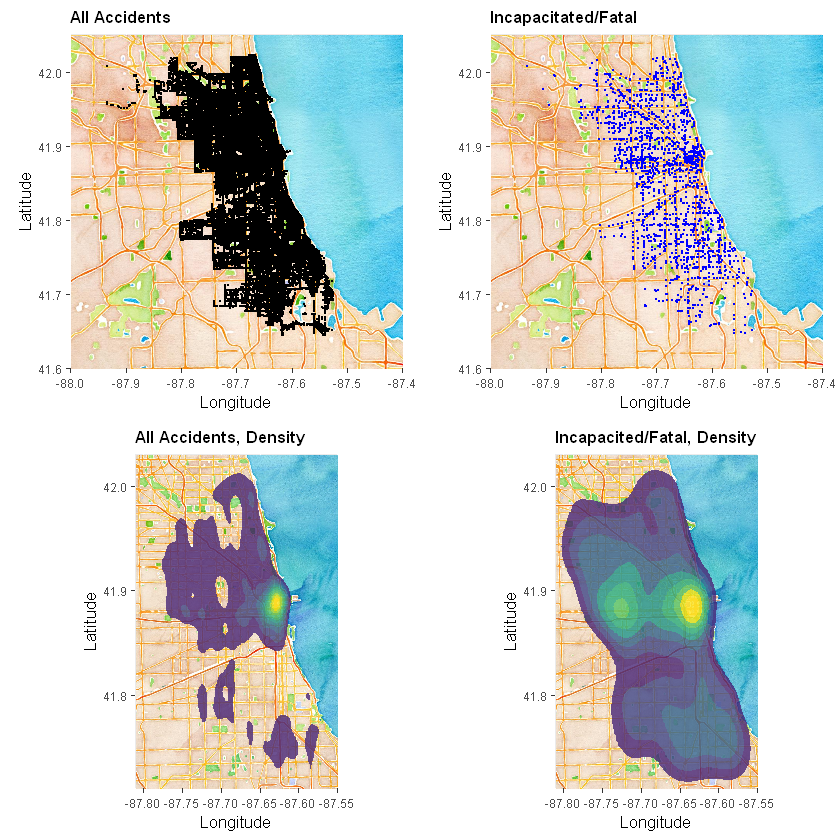

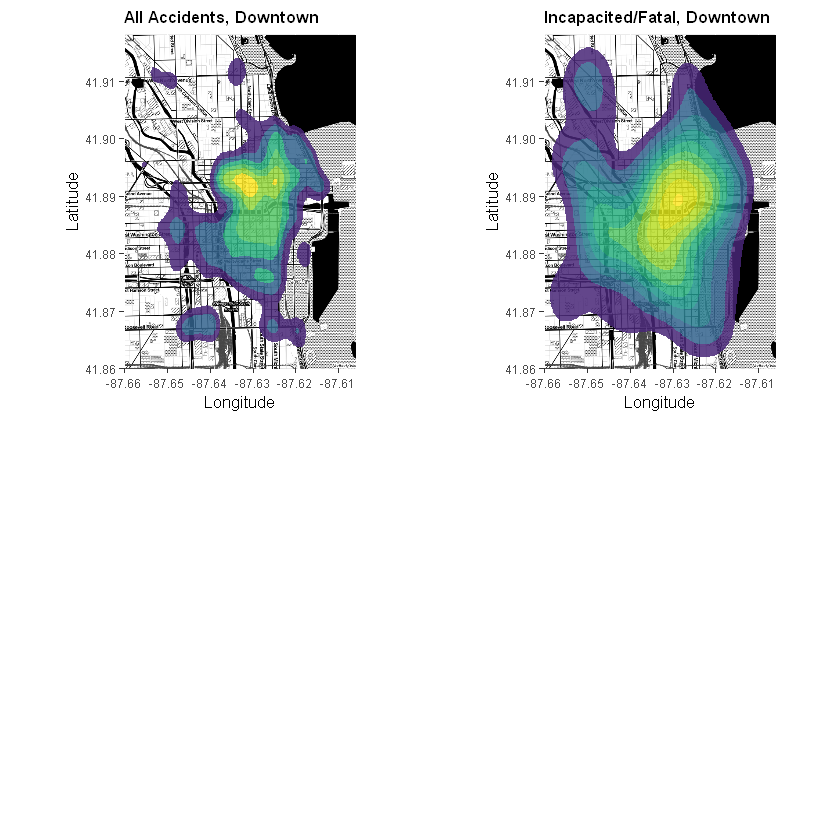

In [324]:
f1 = ggarrange(c1,c2,c5,c6, ncol=2, nrow=2)
f2 = ggarrange(c7,c8,ncol=2, nrow=2)
f1
f2

Warning message:
"Removed 370 rows containing missing values (geom_point)."
Warning message:
"Removed 65 rows containing missing values (geom_point)."


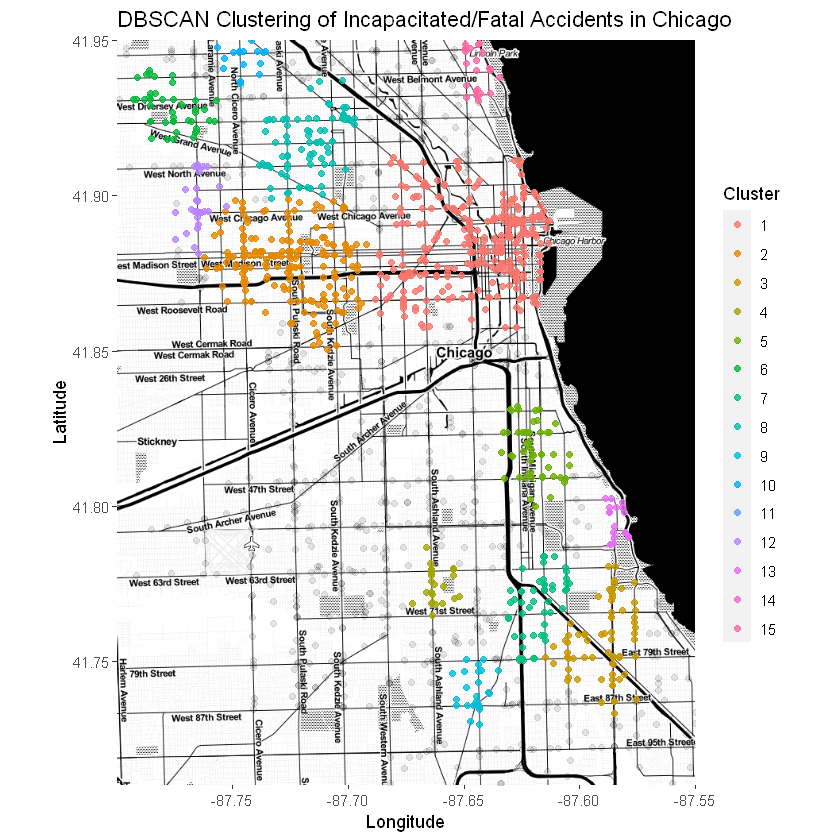

In [341]:
chicago_zoom_toner <- get_stamenmap(bbox = c(left = -87.8, 
                                  bottom = 41.71, 
                                  right = -87.55, 
                                  top = 41.95), 
                         zoom = 12, maptype="toner")

clusters = dbscan(traffic_injuries %>% select(LATITUDE, LONGITUDE), eps=0.01, minPts = 20)

traffic_injuries = traffic_injuries %>% mutate(cluster = clusters$cluster)
Cluster = as.factor((traffic_injuries %>% filter(cluster>0))$cluster)

ggmap(chicago_zoom_toner) + 
geom_point(data=traffic_injuries %>% filter(cluster==0), aes(x = LONGITUDE , y = LATITUDE), alpha=0.1) +
geom_point(data=traffic_injuries %>% filter(cluster>0), 
           aes(x = LONGITUDE , y = LATITUDE, color=Cluster), alpha=0.8) +
xlab("Longitude") + ylab("Latitude") + ggtitle("DBSCAN Clustering of Incapacitated/Fatal Accidents in Chicago")

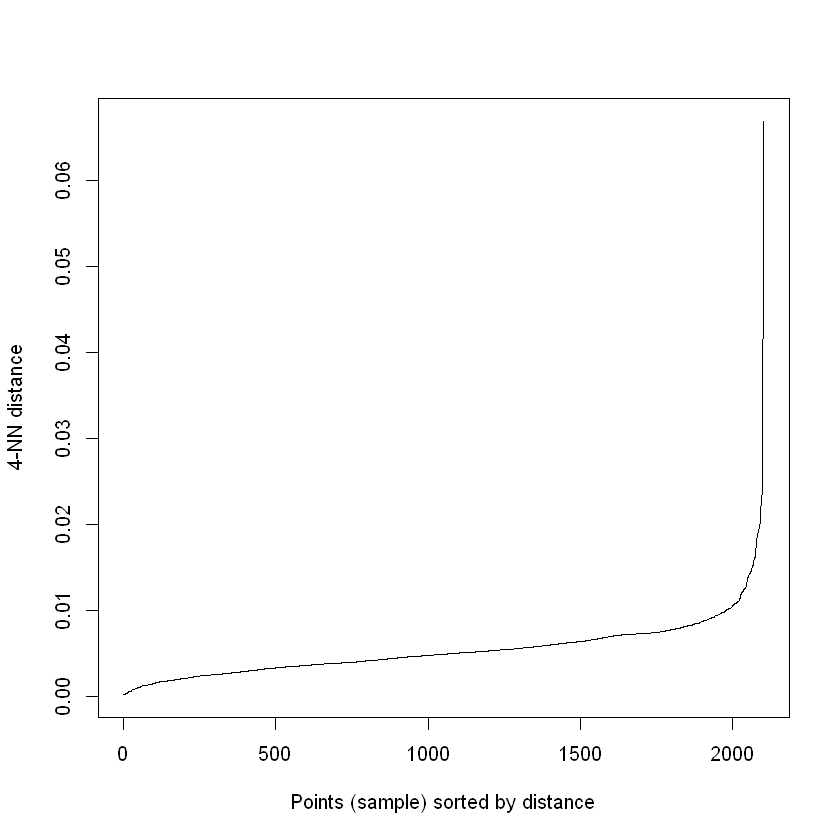

In [342]:
kNNdistplot(rbind(traffic_injuries$LONGITUDE, traffic_injuries$LATITUDE) %>% t, k=4)